In [30]:

import numpy as np
import torch


In [31]:
import os 
os.getcwd()

'/home/vv/IsingModelPractice/NN'

In [32]:
#Load Data
os.chdir('/home/vv/IsingModelPractice/NN')

xy_all = np.loadtxt("/home/vv/IsingModelPractice/Data/Energy w All_4x4_flat.csv", delimiter=",", dtype=np.float32, skiprows=1)
xy = np.loadtxt("/home/vv/IsingModelPractice/Data/Energy w All_4x4_flat.csv even spread 1000.0.csv", delimiter=",", dtype=np.float32, skiprows=1)
# y = np.loadtxt("/content/drive/MyDrive/2 CLEAN/Energy.csv", delimiter=",", dtype=np.float32, skiprows=1)

In [44]:
from torch.autograd import Variable
import random 
# Tried using shuffle on xy, for some reason it chnages the make up of the list
# if applied multiple times to the list, I would get a lot more 32s as per hist
y = [i for i in xy[:,0]]
x = [[i] for i in xy[:,1:17]]
# pytorch requires tensors, the conversion is done
y_all = [i for i in xy_all[:,0]]
x_all = [[i] for i in xy_all[:,1:17]] later

[[ 32.  -1.  -1. ...  -1.  -1.  -1.]
 [ 24.  -1.  -1. ...  -1.  -1.   1.]
 [ 24.  -1.  -1. ...  -1.   1.  -1.]
 ...
 [-32.  -1.   1. ...  -1.   1.  -1.]
 [-32.   1.  -1. ...   1.  -1.   1.]
 [ 32.   1.   1. ...   1.   1.   1.]]


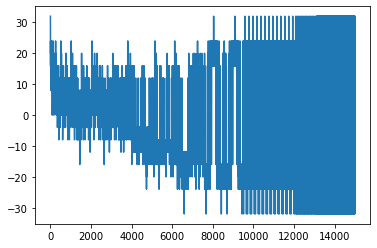

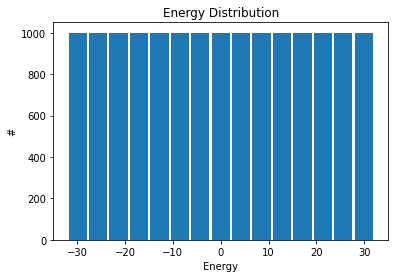

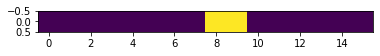

In [45]:
#Double check data
import matplotlib.pyplot as plt

print(xy)

plt.plot(y)
plt.show()
plt,bins=15, rwidth=0.9.
plt.xlabel("Energy")
plt.ylabel("#")
plt.title("Energy Distribution")hist(y)
plt.show()

plt.imshow(x[10000])
plt.show()

In [46]:
import torch.nn as nn
import torch.nn.functional as F

# The Neural Network
class IsingNet(nn.Module):

  def __init__(self):

    super().__init__()
    self.inpune= nn.Linear(16, 64)
    self.output = nn.Linear(64, 1)

    self.act = nn.ReLU()

  def forward(self, x):
    x = self.act(self.input(x))
    y = self.output(x)
    return y

#Initiate model
model=IsingNet()
#czech
print(model)

IsingNet(
  (input): Linear(in_features=16, out_features=1500, bias=True)
  (output): Linear(in_features=1500, out_features=1, bias=True)
  (act): ReLU()
)


In [47]:
len(x)

15000

In [48]:
#Set network into training mode
model.train()
MSE_loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), 0.001)
criterion = torch.nn.BCELoss(size_average=True)

n_epochs = 15000

for epoch in range(n_epochs):

    # This is instead of batching or using built in DataLoader
    # random is necessary, because original list is sorted
    row = list(range(15000))
    #picking a random element from data and converting to tensor
    x_point = torch.as_tensor(x[epoch])
    y_point = torch.as_tensor(y[epoch], dtype=torch.float)
  
    #Get network output
    prediction = model(x_point)

    #Make the output have correct data type
    y_point = y_point.unsqueeze(0)
    y_point = y_point.unsqueeze(1)

    #Calculate loss
    loss = MSE_loss(prediction,y_point)

    #Zero gradients
    optimizer.zero_grad()

    #Calculate gradients
    loss.backward()

    #Update weights
    optimizer.step()   

    #Print progress
    if (epoch+1)%(n_epochs//10) == 0:
      print("Epoch %g/%g, progress: %g%%" %(epoch+1,n_epochs,(epoch+1)/n_epochs*100))

#Training finished, gradients no longer need to be kept
#Sets network into evaluation mode
model.eval()

/home/vv/.local/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
Epoch 1500/15000, progress: 10%
Epoch 3000/15000, progress: 20%
Epoch 4500/15000, progress: 30%
Epoch 6000/15000, progress: 40%
Epoch 7500/15000, progress: 50%
Epoch 9000/15000, progress: 60%
Epoch 10500/15000, progress: 70%
Epoch 12000/15000, progress: 80%
Epoch 13500/15000, progress: 90%
Epoch 15000/15000, progress: 100%


IsingNet(
  (input): Linear(in_features=16, out_features=1500, bias=True)
  (output): Linear(in_features=1500, out_features=1, bias=True)
  (act): ReLU()
)

In [53]:
# Use model to predict energies of entire dataset, for all 4x4 square Ising states 
y_pred = []

for i in xy_all[:,1:17]:
  j = torch.as_tensor(i)
  y_pred.append(model(j).item()) #.item() converts tensor back to float


In [54]:
correlation_matrix = np.corrcoef(y_all, y_pred)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2

print(r_squared)

0.8961509022855143


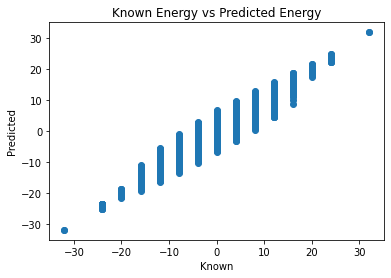

Note that the predicted is continuous, because regression


In [55]:

plt.scatter(y_all,y_pred)y_pred)
plt.title("Known Energy vs Predicted Energy")
plt.xlabel("Known")
plt.ylabel("Predicted")
plt.show()
print("Note that the predicted is continuous, because regression")

In [57]:
abs_error = [np.abs(y_all[i]-y_pred[i]) for i in range(65536)]

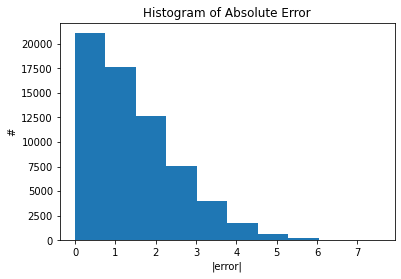

In [58]:
plt.hist(abs_error)
plt.title("Histogram of Absolute Error")
plt.ylabel("#")
plt.xlabel("|error|")
plt.show()

In [60]:
torch.save(model.state_dict(), "/home/vv/IsingModelPractice/NN/rand_train_set.pt")